In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json

In [2]:
#url for API data
url = 'https://api.collegefootballdata.com/games/media?year=2007'

#open url
r=requests.get(url)

#read contents
contents=(r.text)

#parse json string
info = json.loads(contents)

In [3]:
#see data layout
info[101]

{'id': 272980259,
 'season': 2007,
 'week': 9,
 'seasonType': 'regular',
 'startTime': '2007-10-25T19:30:00.000Z',
 'isStartTimeTBD': None,
 'homeTeam': 'Virginia Tech',
 'homeConference': 'ACC',
 'awayTeam': 'Boston College',
 'awayConference': 'ACC',
 'mediaType': 'tv',
 'outlet': 'ESPN'}

In [4]:
info

[{'id': 272420344,
  'season': 2007,
  'week': 1,
  'seasonType': 'regular',
  'startTime': '2007-08-30T20:00:00.000Z',
  'isStartTimeTBD': None,
  'homeTeam': 'Mississippi State',
  'homeConference': 'SEC',
  'awayTeam': 'LSU',
  'awayConference': 'SEC',
  'mediaType': 'tv',
  'outlet': 'ESPN'},
 {'id': 272420097,
  'season': 2007,
  'week': 1,
  'seasonType': 'regular',
  'startTime': '2007-08-30T19:30:00.000Z',
  'isStartTimeTBD': None,
  'homeTeam': 'Louisville',
  'homeConference': 'Big East',
  'awayTeam': 'Murray State',
  'awayConference': None,
  'mediaType': 'tv',
  'outlet': 'ESPNU'},
 {'id': 272420068,
  'season': 2007,
  'week': 1,
  'seasonType': 'regular',
  'startTime': '2007-08-30T21:05:00.000Z',
  'isStartTimeTBD': None,
  'homeTeam': 'Boise State',
  'homeConference': 'Western Athletic',
  'awayTeam': 'Weber State',
  'awayConference': None,
  'mediaType': 'web',
  'outlet': 'ESPN3'},
 {'id': 272422132,
  'season': 2007,
  'week': 1,
  'seasonType': 'regular',
  'sta

In [9]:
#convert json data to dataframe
df = pd.json_normalize(info)
print(df.shape)
df.head()

(191, 12)


,id,season,week,seasonType,startTime,isStartTimeTBD,homeTeam,homeConference,awayTeam,awayConference,mediaType,outlet
0,272420344,2007,1,regular,2007-08-30T20:00:00.000Z,None,Mississippi State,SEC,LSU,SEC,tv,ESPN
1,272420097,2007,1,regular,2007-08-30T19:30:00.000Z,None,Louisville,Big East,Murray State,None,tv,ESPNU
2,272420068,2007,1,regular,2007-08-30T21:05:00.000Z,None,Boise State,Western Athletic,Weber State,None,web,ESPN3
3,272422132,2007,1,regular,2007-08-30T19:00:00.000Z,None,Cincinnati,Big East,Southeast Missouri State,None,web,ESPN3
4,272420166,2007,1,regular,2007-08-30T20:00:00.000Z,None,New Mexico State,Western Athletic,Southeastern Louisiana,None,web,ESPN3


In [25]:
#rename columns
df_renamed=df.rename(columns={"id": "game_id", "startTime": "Date_time", "homeTeam":"home_team", "homeConference":"home_conference", 
                              "awayTeam":"away_team", "awayConference":"away_conference", "mediaType":"media_type"})
df_renamed.head()

,game_id,season,week,seasonType,Date_time,isStartTimeTBD,home_team,home_conference,away_team,away_conference,media_type,outlet
0,272420344,2007,1,regular,2007-08-30T20:00:00.000Z,None,Mississippi State,SEC,LSU,SEC,tv,ESPN
1,272420097,2007,1,regular,2007-08-30T19:30:00.000Z,None,Louisville,Big East,Murray State,None,tv,ESPNU
2,272420068,2007,1,regular,2007-08-30T21:05:00.000Z,None,Boise State,Western Athletic,Weber State,None,web,ESPN3
3,272422132,2007,1,regular,2007-08-30T19:00:00.000Z,None,Cincinnati,Big East,Southeast Missouri State,None,web,ESPN3
4,272420166,2007,1,regular,2007-08-30T20:00:00.000Z,None,New Mexico State,Western Athletic,Southeastern Louisiana,None,web,ESPN3


In [26]:
#drop unneccesary/blank/null columns
df_dropped=df_renamed.drop(columns=['seasonType', 'isStartTimeTBD'])
print(df_dropped.shape)
df_dropped.head()

(191, 10)


,game_id,season,week,Date_time,home_team,home_conference,away_team,away_conference,media_type,outlet
0,272420344,2007,1,2007-08-30T20:00:00.000Z,Mississippi State,SEC,LSU,SEC,tv,ESPN
1,272420097,2007,1,2007-08-30T19:30:00.000Z,Louisville,Big East,Murray State,None,tv,ESPNU
2,272420068,2007,1,2007-08-30T21:05:00.000Z,Boise State,Western Athletic,Weber State,None,web,ESPN3
3,272422132,2007,1,2007-08-30T19:00:00.000Z,Cincinnati,Big East,Southeast Missouri State,None,web,ESPN3
4,272420166,2007,1,2007-08-30T20:00:00.000Z,New Mexico State,Western Athletic,Southeastern Louisiana,None,web,ESPN3


In [27]:
#format data

#create new dataframe from df_dropped
df_formatted=df_dropped

#add date column from start_date
df_formatted['date']=df_dropped['Date_time'].str[:10]

#add time column from start_date
df_formatted['time']=df_dropped['Date_time'].str[11:16]
df_formatted.head()

#fill in blanks in conferences columns with FCS
df_formatted['home_conference'].fillna('FCS', inplace=True)
df_formatted['away_conference'].fillna('FCS', inplace=True)

df_formatted.head()

,game_id,season,week,Date_time,home_team,home_conference,away_team,away_conference,media_type,outlet,date,time
0,272420344,2007,1,2007-08-30T20:00:00.000Z,Mississippi State,SEC,LSU,SEC,tv,ESPN,2007-08-30,20:00
1,272420097,2007,1,2007-08-30T19:30:00.000Z,Louisville,Big East,Murray State,FCS,tv,ESPNU,2007-08-30,19:30
2,272420068,2007,1,2007-08-30T21:05:00.000Z,Boise State,Western Athletic,Weber State,FCS,web,ESPN3,2007-08-30,21:05
3,272422132,2007,1,2007-08-30T19:00:00.000Z,Cincinnati,Big East,Southeast Missouri State,FCS,web,ESPN3,2007-08-30,19:00
4,272420166,2007,1,2007-08-30T20:00:00.000Z,New Mexico State,Western Athletic,Southeastern Louisiana,FCS,web,ESPN3,2007-08-30,20:00


In [70]:
#see different media types
df_formatted['media_type'].unique()

array(['tv', 'web'], dtype=object)

In [71]:
#see different chanels
df_formatted['outlet'].unique()

array(['ESPN', 'ESPNU', 'ESPN3', 'ABC', 'ESPN2', 'NBCSN', 'CBSSN',
       'ESPNC', 'NBC', 'CBS', 'NFL'], dtype=object)

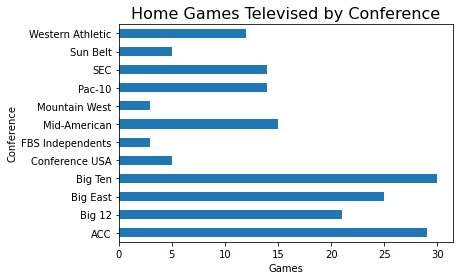

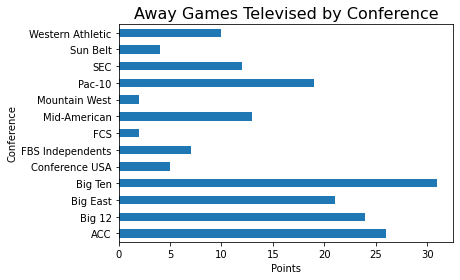

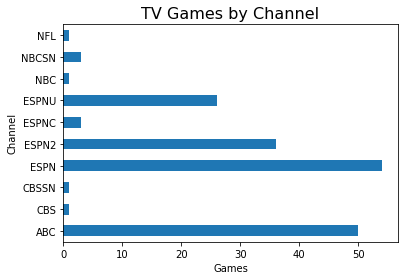

In [73]:
#create dataframes for each medium
df_tv=df_formatted[df_formatted['media_type']=='tv']
df_web=df_formatted[df_formatted['media_type']=='web']

#bar chart of total TV games by conference
df_tv.groupby('home_conference')['game_id'].count().plot(kind='barh')
plt.title("Home Games Televised by Conference",fontsize=16) 
plt.xlabel("Games") 
plt.ylabel("Conference") 
plt.show()

# bar chart of total away team points by conference
df_tv.groupby('away_conference')['game_id'].count().plot(kind='barh')
plt.title("Away Games Televised by Conference",fontsize=16) 
plt.xlabel("Points") 
plt.ylabel("Conference") 
plt.show()

#bar chart of total TV games by channel
df_tv.groupby('outlet')['game_id'].count().plot(kind='barh')
plt.title("TV Games by Channel",fontsize=16) 
plt.xlabel("Games") 
plt.ylabel("Channel") 
plt.show()

The "Power Conferences" had the most games televised while the lest prestigious conferences had fewer games televised. Most games were on ABC/ESPN family of networks.

In [68]:
#check for bad data
#games typically start at 11 AM and don't start after 9PM or so
#if points >100
df_formatted['bad_data']=((df_formatted['time']>"21:00") | (df_formatted['time']<"11:00"))
df_formatted.bad_data.sum()


8

In [69]:
#checking possible bad data games
df_formatted[df_formatted.bad_data==True]

,game_id,season,week,Date_time,home_team,home_conference,away_team,away_conference,media_type,outlet,date,time,bad_data
2,272420068,2007,1,2007-08-30T21:05:00.000Z,Boise State,Western Athletic,Weber State,FCS,web,ESPN3,2007-08-30,21:05,True
22,272510099,2007,2,2007-09-08T21:22:00.000Z,LSU,SEC,Virginia Tech,ACC,tv,ESPN,2007-09-08,21:22,True
24,272512439,2007,2,2007-09-08T22:00:00.000Z,UNLV,Mountain West,Wisconsin,Big Ten,tv,NBCSN,2007-09-08,22:00,True
50,272580038,2007,3,2007-09-15T22:00:00.000Z,Colorado,Big 12,Florida State,ACC,tv,ESPN,2007-09-15,22:00,True
85,272862306,2007,7,2007-10-13T21:15:00.000Z,Kansas State,Big 12,Colorado,Big 12,tv,ESPN2,2007-10-13,21:15,True
142,273140062,2007,11,2007-11-10T23:00:00.000Z,Hawai'i,Western Athletic,Fresno State,Western Athletic,tv,ESPN2,2007-11-10,23:00,True
150,273202440,2007,12,2007-11-16T23:00:00.000Z,Nevada,Western Athletic,Hawai'i,Western Athletic,tv,ESPN2,2007-11-16,23:00,True
181,273350062,2007,14,2007-12-01T23:30:00.000Z,Hawai'i,Western Athletic,Washington,Pac-10,tv,ESPN,2007-12-01,23:30,True


Most of these games either started just after 9 or were played on the Pacific or Hawaii time zone. This seems reasonable. 

In [49]:
from Levenshtein import distance

In [59]:
#Using fuzzy matching to test some team names that are commonly abbreviated
#Testing: BYU, SMU, Penn State, NC State, LSU, TCU, Ole Miss, UCLA, UCF, USC
#if team in home_team column has a Levenshtein value of 0 then print team name
#break after first instance

test = "BYU"
for team in df_formatted.home_team:
    if distance(test, team)==0:
        print(f'{team}: {distance(test, team)}')
        break    
 
test = "SMU"
for team in df_formatted.home_team:
    if distance(test, team)==0:
        print(f'{team}: {distance(test, team)}')
        break
   
test = "Penn State"
for team in df_formatted.home_team:
    if distance(test, team)==0:
        print(f'{team}: {distance(test, team)}')
        break
        
test = "NC State"
for team in df_formatted.home_team:
    if distance(test, team)==0:
        print(f'{team}: {distance(test, team)}')
        break
        
test = "LSU"
for team in df_formatted.home_team:
    if distance(test, team)==0:
        print(f'{team}: {distance(test, team)}')
        break
        
test = "TCU"
for team in df_formatted.home_team:
    if distance(test, team)==0:
        print(f'{team}: {distance(test, team)}')
        break
        
test = "Ole Miss"
for team in df_formatted.home_team:
    if distance(test, team)==0:
        print(f'{team}: {distance(test, team)}')
        break
        
test = "UCF"
for team in df_formatted.home_team:
    if distance(test, team)==0:
        print(f'{team}: {distance(test, team)}')
        break
        
test = "UCLA"
for team in df_formatted.home_team:
    if distance(test, team)==0:
        print(f'{team}: {distance(test, team)}')
        break
        
test = "USC"
for team in df_formatted.home_team:
    if distance(test, team)==0:
        print(f'{team}: {distance(test, team)}')
        break
        
        
#Check away teams 
print('\n------------------Away Teams------------------\n')
test = "BYU"
for team in df_formatted.away_team:
    if distance(test, team)==0:
        print(f'{team}: {distance(test, team)}')
        break    
 
test = "SMU"
for team in df_formatted.away_team:
    if distance(test, team)==0:
        print(f'{team}: {distance(test, team)}')
        break
   
test = "Penn State"
for team in df_formatted.away_team:
    if distance(test, team)==0:
        print(f'{team}: {distance(test, team)}')
        break
        
test = "NC State"
for team in df_formatted.away_team:
    if distance(test, team)==0:
        print(f'{team}: {distance(test, team)}')
        break
        
test = "LSU"
for team in df_formatted.away_team:
    if distance(test, team)==0:
        print(f'{team}: {distance(test, team)}')
        break
        
test = "TCU"
for team in df_formatted.away_team:
    if distance(test, team)==0:
        print(f'{team}: {distance(test, team)}')
        break
        
test = "Ole Miss"
for team in df_formatted.away_team:
    if distance(test, team)==0:
        print(f'{team}: {distance(test, team)}')
        break
        
test = "UCF"
for team in df_formatted.away_team:
    if distance(test, team)==0:
        print(f'{team}: {distance(test, team)}')
        break
        
test = "UCLA"
for team in df_formatted.away_team:
    if distance(test, team)==0:
        print(f'{team}: {distance(test, team)}')
        break
        
test = "USC"
for team in df_formatted.away_team:
    if distance(test, team)==0:
        print(f'{team}: {distance(test, team)}')
        break



Penn State: 0
NC State: 0
LSU: 0
UCF: 0
UCLA: 0
USC: 0

------------------Away Teams------------------

Penn State: 0
NC State: 0
LSU: 0
TCU: 0
UCF: 0
UCLA: 0
USC: 0


Missing BYU, SMU, Ole Miss. It is possible these teams did not have televised games. Let's check.

In [55]:
#checking unique home teams
df_formatted['home_team'].unique()

array(['Mississippi State', 'Louisville', 'Boise State', 'Cincinnati',
       'New Mexico State', 'Utah State', 'Syracuse', 'Wisconsin',
       'California', 'Auburn', 'Nebraska', 'Michigan State', 'Illinois',
       'Northern Illinois', 'Maryland', 'NC State', 'North Carolina',
       'Toledo', 'Clemson', 'Rutgers', 'LSU', 'Oklahoma', 'UNLV',
       'Colorado State', 'Penn State', 'Wake Forest', 'Pittsburgh',
       'Army', 'Michigan', 'Florida International', 'Western Michigan',
       'Troy', 'UCF', 'Washington', 'Utah', 'Alabama', 'Virginia Tech',
       'Purdue', 'Florida Atlantic', 'Iowa State', 'Miami', 'Colorado',
       'Middle Tennessee', 'Tulsa', 'USC', 'Notre Dame', 'Minnesota',
       'South Florida', 'Tulane', 'Florida', 'Boston College', 'Idaho',
       'UCLA', 'San José State', 'Iowa', 'Vanderbilt', 'Virginia',
       'Texas Tech', 'Kansas State', 'Eastern Michigan', 'Connecticut',
       'Ohio State', 'Missouri', 'Indiana', 'Florida State',
       'Fresno State', 'Texa

In [56]:
#checking unique away teams
df_formatted['away_team'].unique()

array(['LSU', 'Murray State', 'Weber State', 'Southeast Missouri State',
       'Southeastern Louisiana', 'UNLV', 'Washington', 'Washington State',
       'Tennessee', 'Kansas State', 'Nevada', 'UAB', 'Missouri', 'Iowa',
       'Villanova', 'UCF', 'James Madison', 'Purdue', 'Florida State',
       'Middle Tennessee', 'Oregon State', 'Navy', 'Virginia Tech',
       'Miami', 'Wisconsin', 'California', 'Notre Dame', 'Nebraska',
       'South Florida', 'Grambling', 'Rhode Island', 'Oregon', 'Maryland',
       'Indiana', 'West Virginia', 'Oklahoma State', 'USC', 'Texas',
       'Ohio State', 'UCLA', 'Arkansas', 'Ohio', 'Pittsburgh',
       'Central Michigan', 'Minnesota', 'Florida International',
       'Wofford', 'UTEP', 'Texas A&M', 'Western Kentucky', 'Oklahoma',
       'Michigan State', 'Southern Mississippi', 'Auburn', 'UMass',
       "Hawai'i", 'Utah', 'New Mexico State', 'South Carolina', 'Arizona',
       'Louisville', 'Illinois', 'Georgia', 'Georgia Tech', 'Connecticut',
       'Co

It does not appear these teams were televised in 2007.